<a href="https://colab.research.google.com/github/ShannonH98/PyTorchUdemyCourse/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Section 4 - Classification
#this is basically binary classification, cause it can either be red or blue

Claasificaton is a problem of prediciting whether something is one thing or another (or in some cases, multiple things)

Step 1. Make Classificaition data and get it ready

In [ ]:
import sklearn.datasets
#popular dataset machine learning library

In [ ]:
#pytorch is mainly deep learning

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#Create the circles
X, y = make_circles(n_samples,
                   noise=0.03, #noise is for randomness
                   random_state=42 )# like the random seed

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of X:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of X:
 [1 1 1 1 0]


In [ ]:
#y is binary class


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


A DataFrame in the pandas library for Python is a two-dimensional, labeled data structure with columns of potentially different data types.

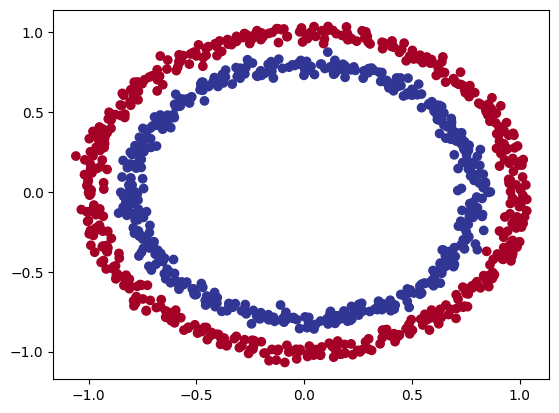

In [ ]:
#Now to get graphical

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)



Toy Data Set

Toy datasets are small, simple datasets commonly used in the field of machine learning for training, testing, and demonstrating algorithms.

1.1 Check Input and Output Shapes

In [ ]:
X.shape, y.shape #y is scalar, X is vector

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and for y: 1
Shapes for one sample of X: (2,) and for y: ()


In [ ]:
#2 features of x, tryin to predict 1 number for y

We need to turn the data into tensors

In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float) #convert because the default type is float64 in numpy
y = torch.from_numpy(y).type(torch.float)

#type now converted

In [ ]:
#We need to split data into training and test sets

from sklearn.model_selection import train_test_split #sklearn has many built in methods and functions for machine learning

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2, #20% is testing and 80% is training
                                                   random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
#Building the Model to classify the blue and red dots

2
Steps to Building the Model

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available). [We should get into the habit of doing this]
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop (this'll be in the next section).

In [ ]:
#Device agnostic code is switch to whichever one is available

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

This model will:

1. Subclasse nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Create 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Define a forward() method containing the forward pass computation of the model.
4. Instantiate the model class and sends it to the target device

In [ ]:
#Constuct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=25)
    self.layer_2 = nn.Linear(in_features=25, out_features=1)
    #out feature of first layer has to match in feature of the previous layer to avoid shape errors

 #3. Define a forward method containing the forward pass computation of the model
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) #x-> layer 1 -> layer 2

#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)

model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=25, bias=True)
  (layer_2): Linear(in_features=25, out_features=1, bias=True)
)

In [ ]:
#Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0 #This would overide the above model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5950,  0.3704],
                      [ 0.1790, -0.0069],
                      [-0.5378, -0.6058],
                      [-0.6614,  0.2895],
                      [-0.3472, -0.1423]])),
             ('0.bias', tensor([-0.4069, -0.1289, -0.4977, -0.4620,  0.2346])),
             ('1.weight',
              tensor([[-0.1329,  0.2761, -0.1435, -0.3281, -0.0789]])),
             ('1.bias', tensor([-0.2168]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}")
print(f"Shape of test samples:{X_test.shape}")
print(f"Predictions:\n{untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Length of test samples: 200
Shape of test samples:torch.Size([200, 2])
Predictions:
tensor([[-0.1360],
        [-0.0354],
        [-0.1838],
        [-0.1234],
        [ 0.1593],
        [ 0.2181],
        [ 0.2297],
        [ 0.2899],
        [-0.1982],
        [-0.0248]])
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
# Create a loss function
# BCE loss function is better suited for classification models
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
#Evaluation metric - how right it is
# Function to calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

Train the Model

1. Forward Pass
2. Calculate the Loss
3. Optimizer zero grad
4. Loss backwards (progogation)
5. Optimizer Step (gradient descent)



In [ ]:
#logits are raw output of the function without being passed to any activation function
#once activated, we can convert our model's prediction probabilty to 'prediction labels'
#by either rounded them or taking the argmax()

#Views first 5 ouput of the forward pass on the test data
model_0.eval() #Put model in eval mode

y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.1360],
        [-0.0354],
        [-0.1838],
        [-0.1234],
        [ 0.1593]], grad_fn=<SliceBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#Use sigmoid activation function on our model logits to turn them into predicition prohabilities
#sigmoid is needed in binary classifications

#
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4660],
        [0.4912],
        [0.4542],
        [0.4692],
        [0.5397]], grad_fn=<SigmoidBackward0>)

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

the prediction probability values, we need to perform a range-style rounding on them:
*   y_preds_probs >= 0.5, 5=1 (class 1)
*   y_preds_probs < 0.5, y=0 (class 0)



In [ ]:

#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full
y_pred_label = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#The raw output is the logit, that is turned into prediction probabilities using torch sigmoid, then turend into lables using torch.round

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_label.squeeze()))

#Remove extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

In [ ]:
torch.manual_seed(42) #for reproducibility
#torch.cuda.manual_seed(42)


# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values


for epoch in range(epochs):
    ### Training

    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> predicition probabilities -> prediction labels

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      #1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      #Test loss and accuracy
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69725, Accuracy: 49.62% | Test loss: 0.69929, Test acc: 52.50%
Epoch: 10 | Loss: 0.69639, Accuracy: 49.50% | Test loss: 0.69804, Test acc: 51.50%
Epoch: 20 | Loss: 0.69576, Accuracy: 49.50% | Test loss: 0.69710, Test acc: 51.50%
Epoch: 30 | Loss: 0.69528, Accuracy: 49.38% | Test loss: 0.69638, Test acc: 52.00%
Epoch: 40 | Loss: 0.69491, Accuracy: 49.38% | Test loss: 0.69582, Test acc: 52.50%
Epoch: 50 | Loss: 0.69462, Accuracy: 49.75% | Test loss: 0.69537, Test acc: 52.50%
Epoch: 60 | Loss: 0.69438, Accuracy: 49.75% | Test loss: 0.69503, Test acc: 52.00%
Epoch: 70 | Loss: 0.69419, Accuracy: 49.25% | Test loss: 0.69475, Test acc: 52.00%
Epoch: 80 | Loss: 0.69403, Accuracy: 49.25% | Test loss: 0.69453, Test acc: 52.00%
Epoch: 90 | Loss: 0.69390, Accuracy: 49.25% | Test loss: 0.69436, Test acc: 51.50%


In [ ]:
#Importing data/files from external source

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


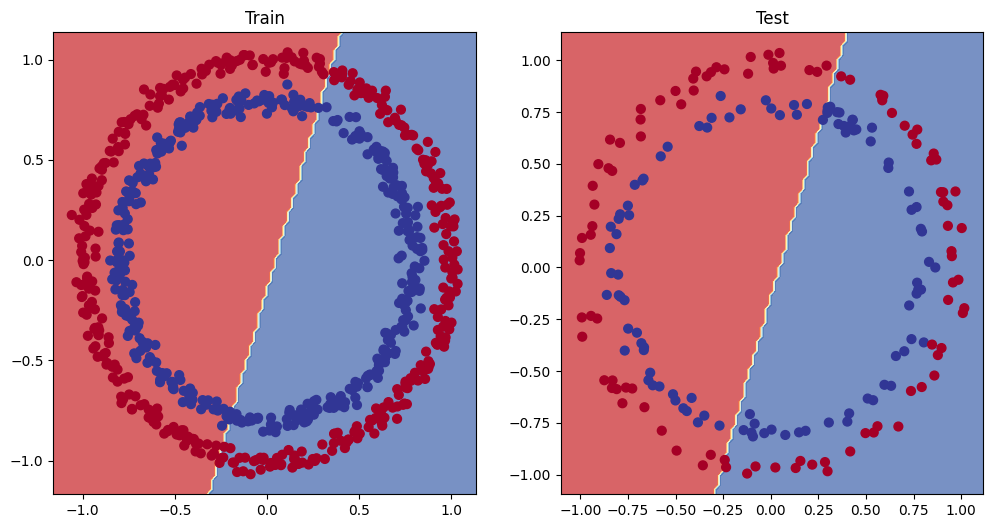

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
#The first model isn't great so we need to imporve it

How to Improve a model

1. Add more layers (give it more chancs to learn patterns)

2. Add more hidden units - this has 5, we could add more

3. Fit for longer

4. Change the activation functions

5. Change the learning rate

5. Change the optimization function



ps. hyperparameter (a value you can set yourself), parameters is what the model updates itself

In [ ]:
#Attempt one is to add an extra layer, would this improve the rate of learning?
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [ ]:
#2nd Try
torch.manual_seed(42) #for reproducibility
#torch.cuda.manual_seed(42)


# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values


for epoch in range(epochs):
    ### Training

    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> predicition probabilities -> prediction labels

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      #1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      #Test loss and accuracy
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 20 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 30 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 40 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 50 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 60 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 70 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 80 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 90 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%


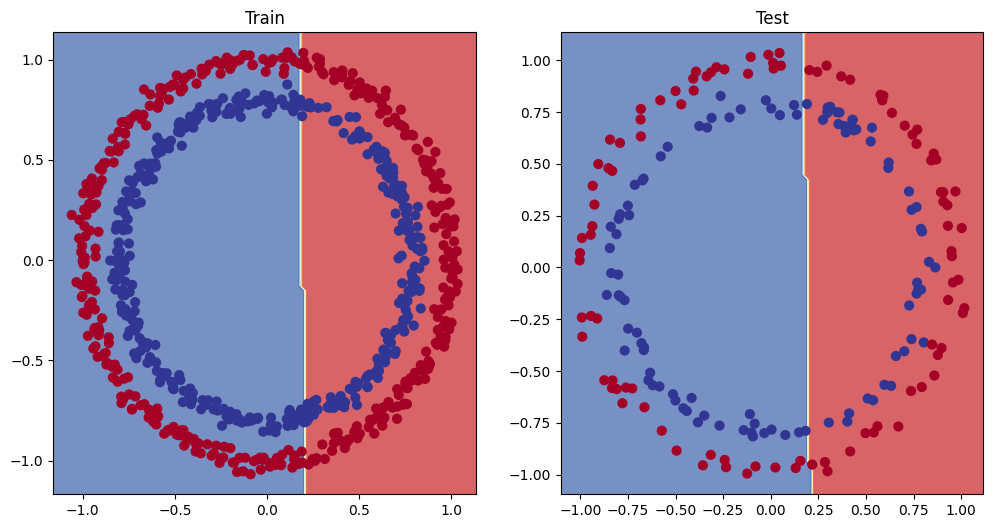

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
#if your at a dead end, try the model on something you know works.
#in this case, it would be what we did in the previous notebook.

# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # the linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


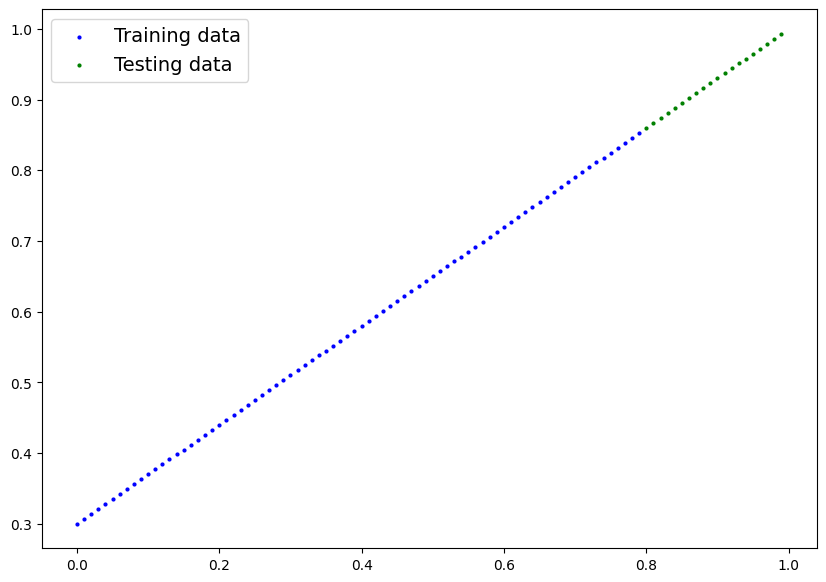

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [ ]:
#Adjust to fit to the slide
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Now we need loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 10000

# send to device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

### Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

    ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #no accuracy because we are working with linear regression
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603
Epoch: 1000 | Train loss: 0.06455, Test loss: 0.02425
Epoch: 1100 | Train loss: 0.05296, Test loss: 0.00773
Epoch: 1200 | Train loss: 0.05297, Test loss: 0.00613
Epoch: 1300 | Train loss: 0.05887, Test loss: 0.01263
Epoch: 1400 | Train loss: 0.05555, Test loss: 0.01105
Epoch: 1500 | Train loss: 0.06256, Test loss: 0.00561
Epoch: 1600 | Train loss: 0.05861, Test loss: 0.00864
Epoch: 1700 | Train loss: 0.05845, Test loss: 0.01513
Epoch: 1800 | Train loss: 0.04373, Test 

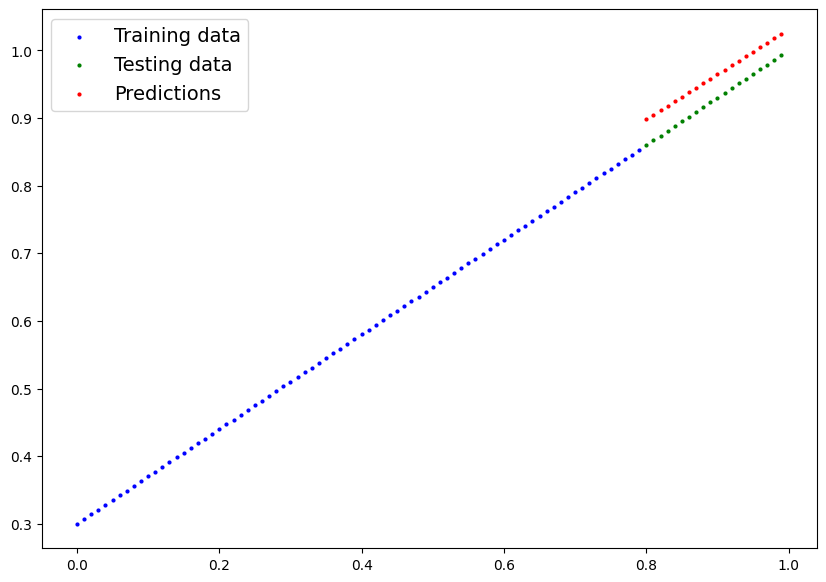

In [ ]:
model_2.eval()

#Make more predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    predictions=y_preds
);


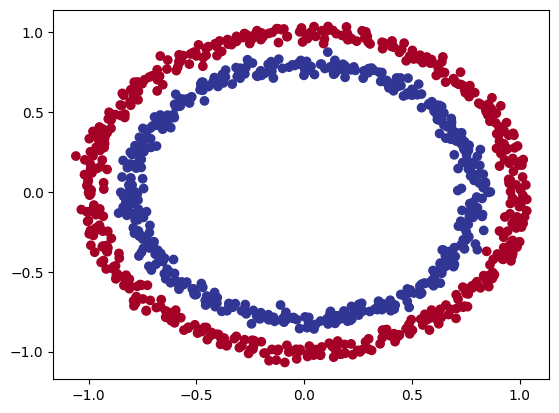

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
#convert data to tensors and then split into train and test split
#same as above
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

Some models need non-linear solutions
linear - straight line
non-linear - non straight line

determine which is needed for you and then use the functions as needed.
The thing is, i guess knowing which to use when will come with experience.

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)
#adding 2 ReLU lines

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 300

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([0., 0., 1., 0., 1., 0., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

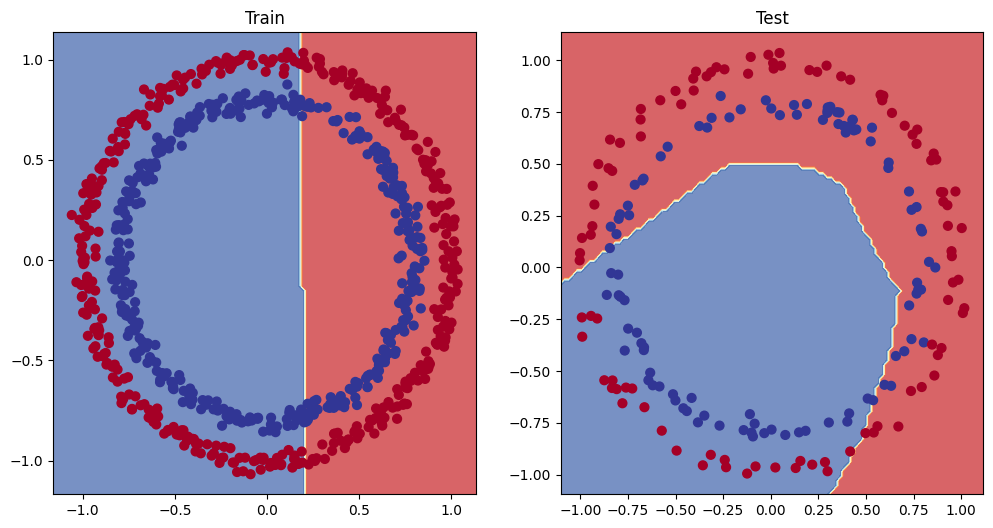

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # has non-linearity

Replicate non-inear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in the data
and it tries to figure out the pattersn on its own

And theses tools can be linear and non linear

In [ ]:
#Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

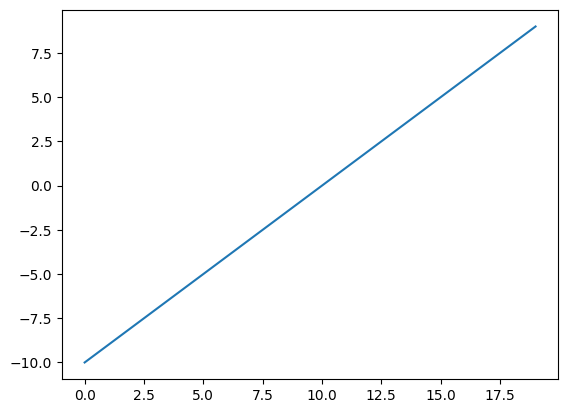

In [ ]:
plt.plot(A)

In [ ]:
def relu(x: torch.Tensor):
  return torch.maximum(torch.zeros_like(x), x) #input must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [ ]:
def sigmoid(x: torch.Tensor):
  return 1 / (1 + torch.exp(-x))

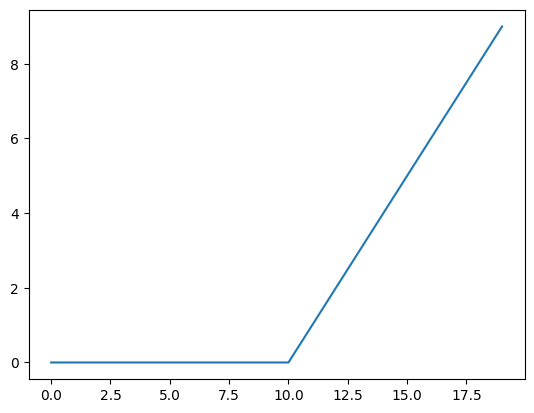

In [ ]:
plt.plot(relu(A))

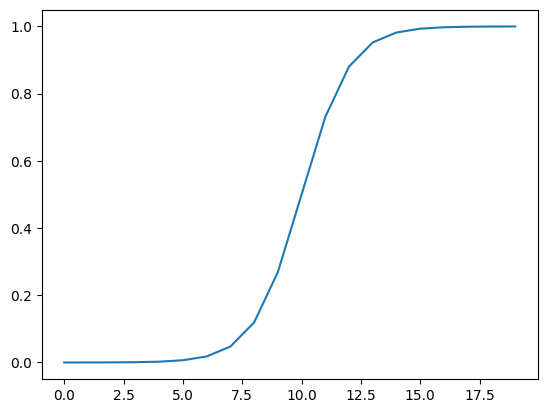

In [ ]:
plt.plot(sigmoid(A));

Putting it all together

Recall a binary classification problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a multi-class classification problem deals with classifying something from a list of more than two options (e.g. classifying a photo as a cat a dog or a chicken).

1. create a multi-class data with make blobs
2. Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
3. Split the data into training and test sets using train_test_split().
4. Visualize,  Visualize, Visualize!

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


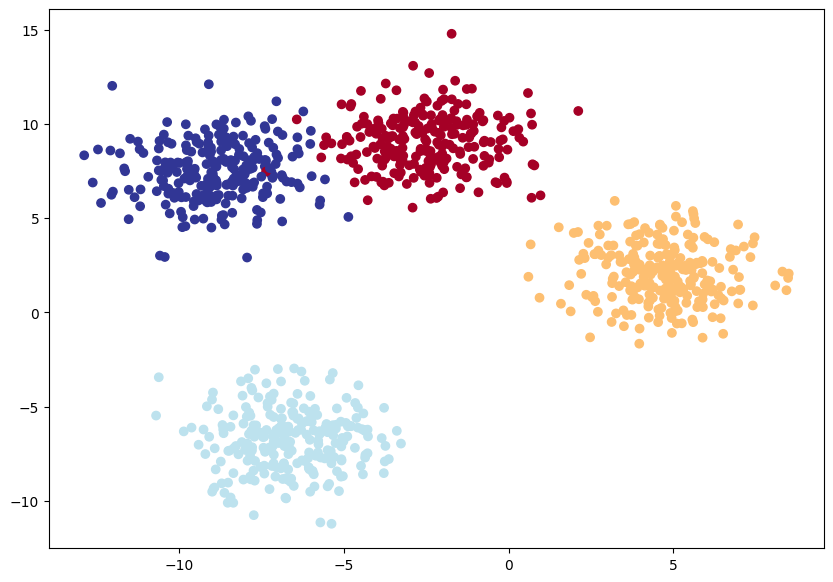

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
#Build a multi-class classification model

class BlobModel(nn.Module):
  def __init__(self,
               input_features,
               output_features,
               hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
        nn.Linear(in_features=hidden_units, out_features=output_features),
        #it still works with non-linear function
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
#Create loss - to measure how wrong the model is
loss_fn = nn.CrossEntropyLoss() #good for multi class classification model

#Create optimizer - to update te model parameters to try and reduce the loss
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1) #learning rate is a hypermarameter so we can chaneg it

In [ ]:
#get raw outputs from the model (logits)
model_4(X_blob_train.to(device))

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        ...,
        [-0.0148, -1.5722, -0.2221,  0.9874],
        [ 2.3231,  0.6656,  2.6783,  1.1564],
        [ 2.1249, -0.9140,  2.2318,  2.1890]], grad_fn=<AddmmBackward0>)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_blob_test.to(device))
y_preds[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

We need to evaluate and train and test our model.
Therefore we need to convert our model's outputs (logits) to predicition probabilities and then to prediciton loabels

Logits(raw output of the model) -> Pred probs (use.torch.softmax) -> Pred Labels (take the argmax of the prediciton probabilities)


In [ ]:
#we need to conver the format (to evaluate and train)
#convert logits to pred probs to pred labels
#to do this we need an activation function

# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_preds, dim=1) #activation function
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [ ]:
#convert prediciton probability to prediciton labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [ ]:
torch.argmax(y_preds_probs[0])

tensor(4)

In [ ]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715])
tensor(3)


In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

now to create training and testing loop

In [ ]:
torch.manual_seed(42)
epochs = 300

# Put all data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

    model_4.train()
    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test).squeeze()
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.04324, Accuracy: 65.50% | Test Loss: 0.57861, Test Accuracy: 95.50%
Epoch: 10 | Loss: 0.14398, Accuracy: 99.12% | Test Loss: 0.13037, Test Accuracy: 99.00%
Epoch: 20 | Loss: 0.08062, Accuracy: 99.12% | Test Loss: 0.07216, Test Accuracy: 99.50%
Epoch: 30 | Loss: 0.05924, Accuracy: 99.12% | Test Loss: 0.05133, Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.04892, Accuracy: 99.00% | Test Loss: 0.04098, Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.04295, Accuracy: 99.00% | Test Loss: 0.03486, Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.03910, Accuracy: 99.00% | Test Loss: 0.03083, Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.03643, Accuracy: 99.00% | Test Loss: 0.02799, Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.03448, Accuracy: 99.00% | Test Loss: 0.02587, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03300, Accuracy: 99.12% | Test Loss: 0.02423, Test Accuracy: 99.50%
Epoch: 100 | Loss: 0.03185, Accuracy: 99.12% | Test Loss: 0.02293, Test Accuracy: 99.50%
Epoch: 110 | Loss: 0.03093, Accu

In [ ]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test) #compare raw logits with test data

# View the first 10 predictions
y_logits[:10]

tensor([[  5.9066,  14.5821, -19.3889, -12.7466],
        [  6.5683, -17.1831,   4.7205,  14.0572],
        [ -7.9280, -18.3605,  26.9596,  16.2524],
        [  2.4625,  10.7829, -11.3262,  -9.2492],
        [ 10.9250,   4.3374, -18.6766,  -4.4997],
        [  7.3130, -21.3492,   6.9154,  17.5181],
        [ -8.4174, -13.8682,  24.1319,  12.4945],
        [  9.5157,  -1.3378, -12.1236,   0.4156],
        [ -7.9941, -25.8041,  32.9343,  22.5517],
        [  9.8591,   0.7435, -14.2719,  -1.3727]])

In [ ]:
#go from logits to prediction probabilities
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


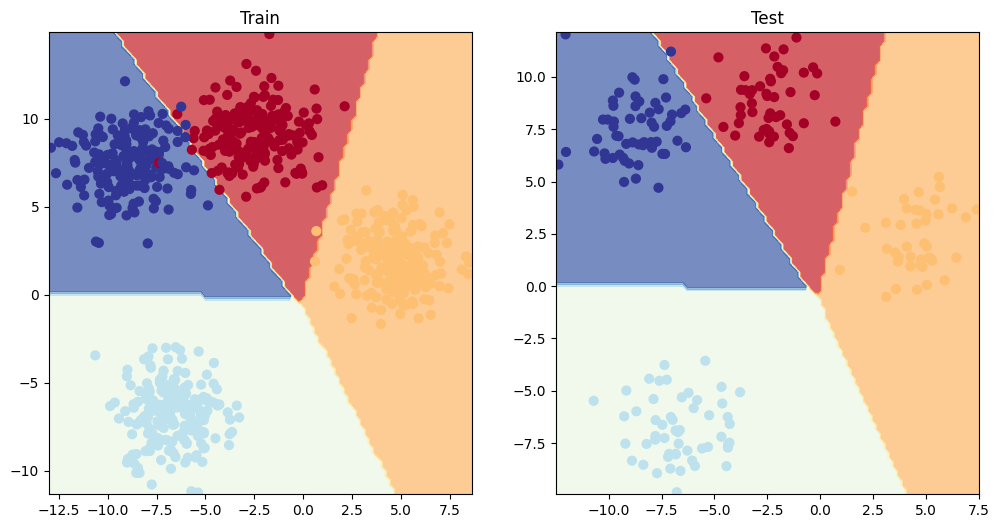

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)